In [1]:
!pip install sudachipy
!pip install sudachidict_core
!pip install transformers
!pip install tf-keras~=2.16
!pip install japanize-matplotlib

In [3]:
from sudachipy import tokenizer
from sudachipy import dictionary
from transformers import pipeline


In [7]:
# Sudachiインスタンス作成
tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C  # 詳細モード

In [9]:
# テキスト
text = "あなたの発言は非常に失礼で、受け入れられないものです。"

In [11]:
# SudachiPyで形態素解析
tokens = [token.surface() for token in tokenizer_obj.tokenize(text, mode) if token.surface() != ""]
print("形態素解析結果:", tokens)

形態素解析結果: ['あなた', 'の', '発言', 'は', '非常', 'に', '失礼', 'で', '、', '受け入れ', 'られ', 'ない', 'もの', 'です', '。']


In [13]:
# 有害性検出モデル
toxicity_classifier = pipeline("text-classification", model="unitary/toxic-bert")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [15]:
# 感情分析モデル Harassment Detector 4で感情と有害性の逆相関をプロットするため、rinnaを加えました。
sentiment_analyzer = pipeline("sentiment-analysis", model="rinna/japanese-roberta-base")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at rinna/japanese-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [17]:
# スコアリストの準備
toxicity_scores = []
sentiment_scores = []

In [19]:
# 分割された単語ごとに有害性を検出
# スコアリストの準備
toxicity_scores = []
sentiment_scores = []

# 分割された単語ごとに有害性と感情を検出
for token in tokens:
    # 有害性検出
    toxicity_result = toxicity_classifier(token)
    toxicity_score = toxicity_result[0]['score']
    toxicity_scores.append(toxicity_score)
    
    # 感情分析
    sentiment_result = sentiment_analyzer(token)
    sentiment_score = sentiment_result[0]['score'] 
    sentiment_scores.append(sentiment_score)
    
    print(f"単語: {token}")
    print(f"  有害性スコア: {toxicity_score}")
    print(f"  感情スコア: {sentiment_score}")

単語: あなた
  有害性スコア: 0.0007685833261348307
  感情スコア: 0.5271493792533875
単語: の
  有害性スコア: 0.0009658244089223444
  感情スコア: 0.5692617297172546
単語: 発言
  有害性スコア: 0.0012355254730209708
  感情スコア: 0.5454961657524109
単語: は
  有害性スコア: 0.0009561330662108958
  感情スコア: 0.5782277584075928
単語: 非常
  有害性スコア: 0.011535150930285454
  感情スコア: 0.5744026303291321
単語: に
  有害性スコア: 0.0009511481039226055
  感情スコア: 0.581559956073761
単語: 失礼
  有害性スコア: 0.011535150930285454
  感情スコア: 0.5457597374916077
単語: で
  有害性スコア: 0.0009430053760297596
  感情スコア: 0.5957769751548767
単語: 、
  有害性スコア: 0.0009492745157331228
  感情スコア: 0.567115306854248
単語: 受け入れ
  有害性スコア: 0.0013194794300943613
  感情スコア: 0.5382459759712219
単語: られ
  有害性スコア: 0.000767198100220412
  感情スコア: 0.5663644075393677
単語: ない
  有害性スコア: 0.0008037105435505509
  感情スコア: 0.57177734375
単語: もの
  有害性スコア: 0.0007604753482155502
  感情スコア: 0.5766309499740601
単語: です
  有害性スコア: 0.0007557941135019064
  感情スコア: 0.5828348398208618
単語: 。
  有害性スコア: 0.0009466097108088434
  感情スコア: 0.5891612768173218


In [23]:
# CSVファイルに書き込み。使いやすいBIにインポートできるようにするため。IBM cognosでの洞察を想定。
import pandas as pd

# DataFrameの作成
results = pd.DataFrame({
    "形態素": tokens,
    "有害性スコア": toxicity_scores,
    "感情スコア": sentiment_scores
})

# DataFrameの表示
print(results)

# CSVファイルとして保存
results.to_csv("text_analysis_results.csv", index=False, encoding='utf-8')
print("結果が 'text_analysis_results.csv' に保存されました。")

     形態素    有害性スコア     感情スコア
0    あなた  0.000769  0.527149
1      の  0.000966  0.569262
2     発言  0.001236  0.545496
3      は  0.000956  0.578228
4     非常  0.011535  0.574403
5      に  0.000951  0.581560
6     失礼  0.011535  0.545760
7      で  0.000943  0.595777
8      、  0.000949  0.567115
9   受け入れ  0.001319  0.538246
10    られ  0.000767  0.566364
11    ない  0.000804  0.571777
12    もの  0.000760  0.576631
13    です  0.000756  0.582835
14     。  0.000947  0.589161
結果が 'text_analysis_results.csv' に保存されました。


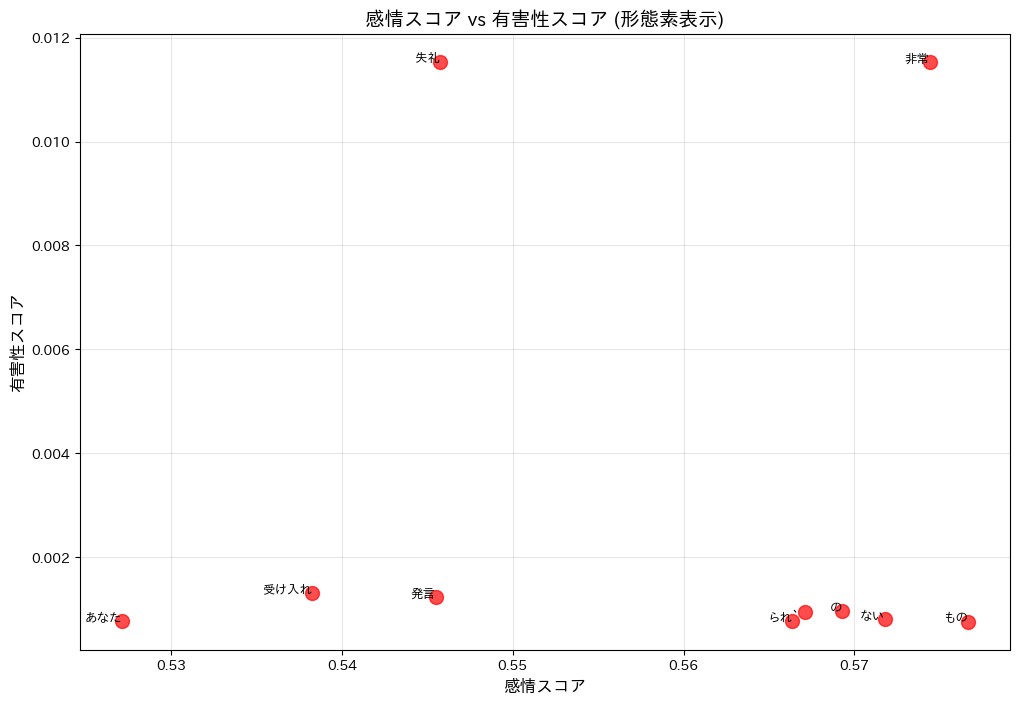

In [25]:
#　X軸: 感情スコア　Y軸: 有害性スコア　各点に形態素をラベルとして表示
# 感情スコアが低い（上位10個）かつ有害性スコアが高いデータを抽出
filtered_data = results.nsmallest(10, '感情スコア').nlargest(10, '有害性スコア')

import matplotlib.pyplot as plt
import matplotlib
import japanize_matplotlib

# プロット
plt.figure(figsize=(12, 8))
plt.scatter(filtered_data['感情スコア'], filtered_data['有害性スコア'], color='red', s=100, alpha=0.7)

# 各点にラベルを表示
for i, row in filtered_data.iterrows():
    plt.text(row['感情スコア'], row['有害性スコア'], row['形態素'], fontsize=9, ha='right')

plt.title('感情スコア vs 有害性スコア (形態素表示)', fontsize=14)
plt.xlabel('感情スコア', fontsize=12)
plt.ylabel('有害性スコア', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/var/folders/ds/6kjlxy3155n7x7prhd6l8bym0000gn/T/ipykernel_2254/3612675766.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='形態素', y='有害性スコア', data=top_data, palette='Reds', label='有害性スコア')
/var/folders/ds/6kjlxy3155n7x7prhd6l8bym0000gn/T/ipykernel_2254/3612675766.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='形態素', y='感情スコア', data=top_data, palette='Blues', 

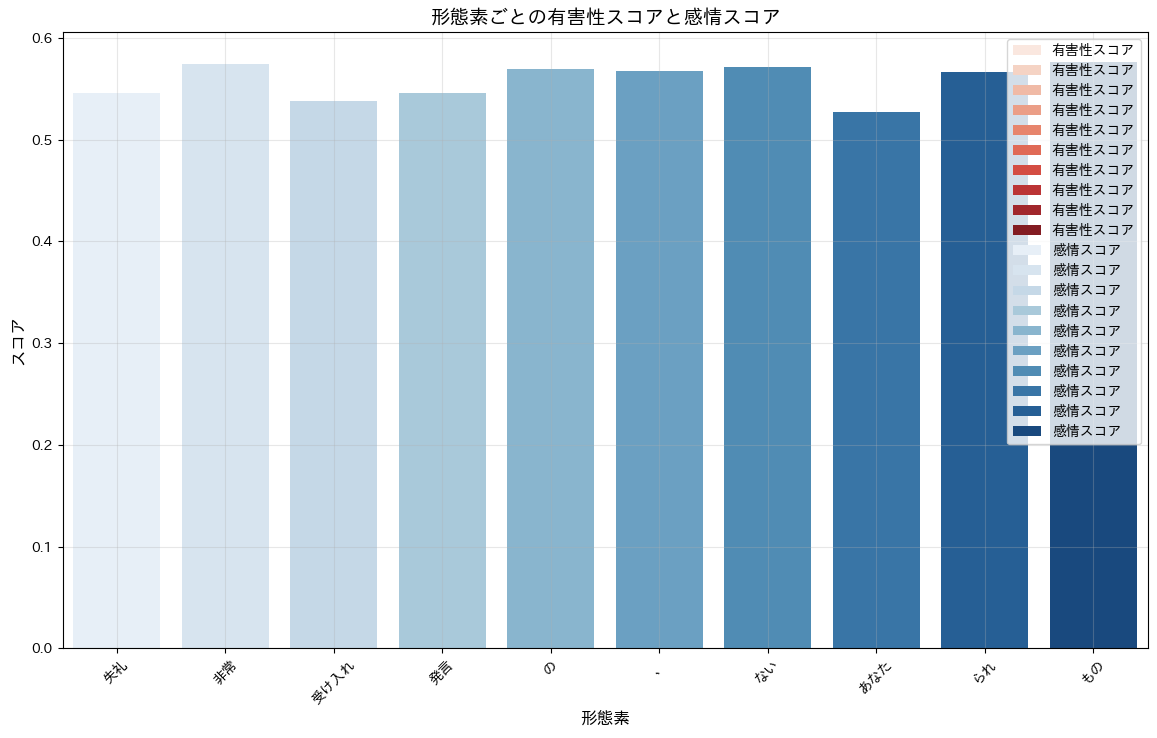

In [27]:
import seaborn as sns

# 上位スコアに基づくデータ抽出
top_data = filtered_data.sort_values(by='有害性スコア', ascending=False)

# プロット
plt.figure(figsize=(14, 8))
sns.barplot(x='形態素', y='有害性スコア', data=top_data, palette='Reds', label='有害性スコア')
sns.barplot(x='形態素', y='感情スコア', data=top_data, palette='Blues', label='感情スコア')

# グラフの装飾
plt.title('形態素ごとの有害性スコアと感情スコア', fontsize=14)
plt.xlabel('形態素', fontsize=12)
plt.ylabel('スコア', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

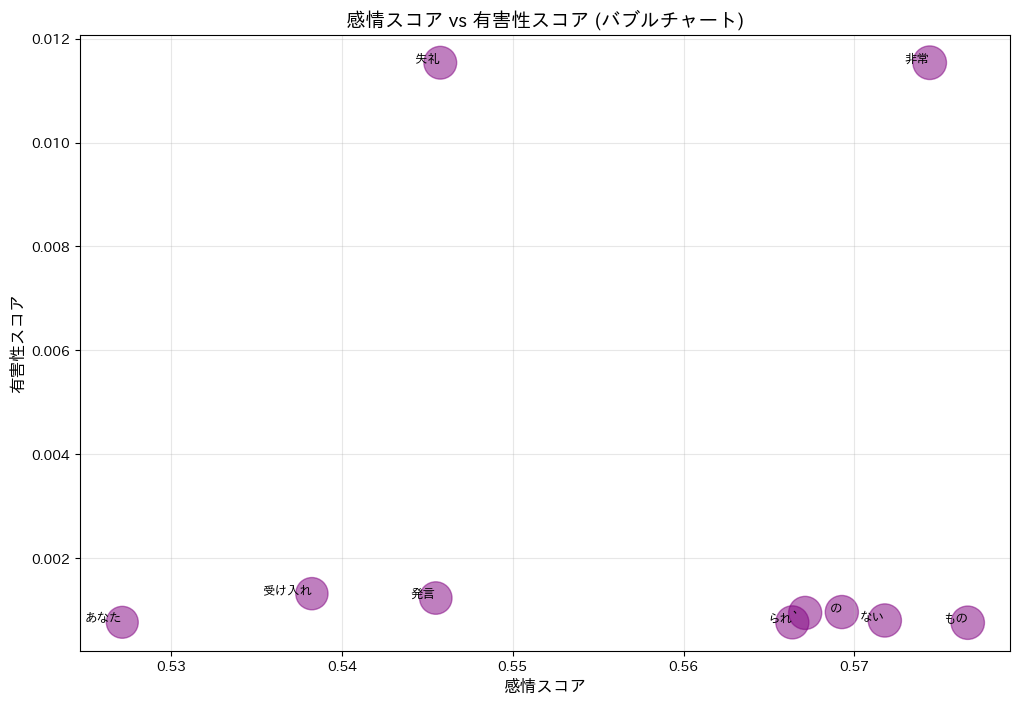

In [29]:
# バブルサイズを計算
filtered_data['bubble_size'] = filtered_data['感情スコア'] + filtered_data['有害性スコア']

# プロット
plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_data['感情スコア'],
    filtered_data['有害性スコア'],
    s=filtered_data['bubble_size'] * 1000,  # バブルサイズを調整
    alpha=0.5,
    color='purple'
)

# ラベルを追加
for i, row in filtered_data.iterrows():
    plt.text(row['感情スコア'], row['有害性スコア'], row['形態素'], fontsize=9, ha='right')

plt.title('感情スコア vs 有害性スコア (バブルチャート)', fontsize=14)
plt.xlabel('感情スコア', fontsize=12)
plt.ylabel('有害性スコア', fontsize=12)
plt.grid(alpha=0.3)
plt.show()